In [12]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

In [99]:
path="./data/11.20-newhardware/insertion_task2_testset/"
folder_list = os.listdir(path)

In [100]:
folder_list

['diagonal_2points', 'one_line', 'one_surface']

Import dataset

In [101]:
file_size=10
def get_data(raw_data):
  data=raw_data.drop(["msg","time(second)"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishdiagonal_2points
finishone_line
finishone_surface


In [146]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [147]:
path="./data/11.20-newhardware/insertion_task3_trainset/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()
# labellist=['alu_hollow_thick','alu_hollow_thin','alu','brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['alu','brass','printpla','pla','printresin','wood']
labellist=folder_list
# labellist=['center','edge','middle']
# labellist=['full','stand','point']
# labellist=['1','2']
for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


half_contact_in_hole half_contact_in_hole
right_above_in_hole right_above_in_hole
not_in_hole_1 not_in_hole_1
dia_contact_in_hole dia_contact_in_hole
not_in_hole_2 not_in_hole_2


In [148]:
df_all2=pd.DataFrame()
path_2="./data/11.20-newhardware/insertion_task3_testset/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

half_contact_in_hole half_contact_in_hole
right_above_in_hole right_above_in_hole
not_in_hole_1 not_in_hole_1
dia_contact_in_hole dia_contact_in_hole
not_in_hole_2 not_in_hole_2


In [149]:
df_all=df_all.dropna(axis=0)
df_all2=df_all2.dropna(axis=0)


In [150]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.0,1172.0,724.0,-373.0,59.0,5.0,-1298.0,-403.0,-321.0,-398.0,...,15.0,824.0,434.0,272.0,304.0,-1.0,-229.0,633.0,404.0,-188.0
1,1.0,-1270.0,-842.0,127.0,11.0,6.0,1249.0,47.0,130.0,470.0,...,12.0,-909.0,-213.0,-120.0,-359.0,0.0,-82.0,-549.0,-462.0,50.0
2,-4.0,1267.0,837.0,97.0,-60.0,8.0,-1058.0,304.0,94.0,-471.0,...,6.0,907.0,-24.0,-38.0,374.0,2.0,396.0,475.0,467.0,71.0
3,3.0,-1084.0,-746.0,-345.0,117.0,5.0,760.0,-633.0,-289.0,420.0,...,12.0,-802.0,278.0,202.0,-331.0,-2.0,-659.0,-275.0,-405.0,-197.0
4,4.0,818.0,548.0,516.0,-132.0,4.0,-377.0,886.0,466.0,-309.0,...,10.0,613.0,-486.0,-322.0,253.0,3.0,865.0,117.0,308.0,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42748,122.0,78.0,59.0,-82.0,14.0,-89.0,-71.0,-69.0,-24.0,-41.0,...,89.0,80.0,39.0,-8.0,65.0,-73.0,-39.0,70.0,61.0,0.0
42749,-26.0,-136.0,-112.0,52.0,7.0,129.0,103.0,93.0,15.0,52.0,...,-106.0,-85.0,-8.0,33.0,-55.0,48.0,7.0,-75.0,-59.0,-22.0
42750,-52.0,151.0,111.0,-2.0,-6.0,-142.0,-99.0,-103.0,31.0,-39.0,...,134.0,89.0,-26.0,-63.0,46.0,16.0,28.0,70.0,43.0,45.0
42751,136.0,-156.0,-117.0,-43.0,26.0,143.0,97.0,99.0,-37.0,29.0,...,-112.0,-66.0,56.0,65.0,-17.0,-44.0,-64.0,-49.0,-24.0,-48.0


In [151]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,10.0,-1004.0,-810.0,-551.0,97.0,-4.0,275.0,-40.0,360.0,-279.0,...,-4.0,1072.0,678.0,-218.0,-96.0,-7.0,266.0,-543.0,-373.0,82.0
1,5.0,1021.0,721.0,610.0,-201.0,-5.0,3.0,259.0,-377.0,237.0,...,2.0,-1127.0,-735.0,7.0,237.0,-6.0,-2.0,494.0,411.0,-163.0
2,3.0,-942.0,-577.0,-601.0,301.0,-3.0,-304.0,-451.0,356.0,-149.0,...,4.0,1024.0,693.0,189.0,-384.0,-7.0,-265.0,-402.0,-412.0,223.0
3,10.0,738.0,335.0,514.0,-349.0,-4.0,549.0,588.0,-275.0,56.0,...,4.0,-836.0,-580.0,-379.0,439.0,-9.0,498.0,245.0,340.0,-260.0
4,11.0,-469.0,-73.0,-371.0,365.0,-7.0,-753.0,-664.0,169.0,55.0,...,-1.0,518.0,381.0,501.0,-476.0,-5.0,-686.0,-77.0,-248.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43260,-121.0,-97.0,86.0,-8.0,-54.0,165.0,98.0,83.0,-85.0,2.0,...,216.0,118.0,49.0,-88.0,-104.0,-94.0,-127.0,43.0,14.0,-59.0
43261,168.0,152.0,-35.0,-23.0,74.0,-96.0,-16.0,-99.0,62.0,9.0,...,-256.0,-168.0,21.0,50.0,49.0,144.0,142.0,-13.0,-46.0,42.0
43262,-231.0,-144.0,-9.0,71.0,-50.0,59.0,7.0,97.0,-58.0,-38.0,...,254.0,217.0,-76.0,17.0,-2.0,-165.0,-125.0,-32.0,66.0,-41.0
43263,231.0,153.0,59.0,-86.0,45.0,39.0,78.0,-80.0,9.0,40.0,...,-213.0,-212.0,130.0,-59.0,-56.0,170.0,92.0,58.0,-84.0,-1.0


In [152]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [153]:
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)
df_all=fft_self(df_all)
df_all2=fft_self(df_all2)

In [21]:
def positive_find_peak(df):
    df.columns=[i for i in range(df.shape[1])]
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)
    def pfp(singleCol):
        data_positive=np.abs(singleCol)
        peaks_idx,_=find_peaks(data_positive)
        return data_positive[peaks_idx]
    new=pd.DataFrame()
    for column in data_rows:
        data=np.array(data_rows[column])
        df_temp=pd.DataFrame(pfp(data))
        new = pd.concat([new, df_temp], axis=1,ignore_index=True)
    
    new.loc['label']=label_row
    # print(new)
    return new

In [22]:
df_=positive_find_peak(df_all.copy())
df_drop=df_.dropna(axis=0)
df_all=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

df_=positive_find_peak(df_all2.copy())
df_drop=df_.dropna(axis=0)
df_all2=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

In [154]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,22559.000000,20548.000000,20472.000000,20271.000000,19653.000000,18447.000000,21795.000000,22065.000000,20770.000000,20547.000000,...,19716.000000,22629.000000,20194.000000,20835.000000,21784.000000,21002.000000,20031.000000,19168.000000,23075.000000,18050.000000
1,3020.225013,1066.765933,455.837928,1325.150182,2534.143625,1172.845002,1960.149964,1440.875449,2574.319854,3927.180096,...,784.411793,988.236893,1456.322825,1189.224336,1220.450873,1660.385607,1900.798239,1427.382880,812.247506,3117.906596
2,1925.641444,876.028759,2805.880768,1792.926428,1204.021728,1635.826217,3916.289510,578.591024,2249.983655,1211.705062,...,1872.424705,1861.406379,1806.603055,1096.043330,238.938346,2730.458641,2226.686878,449.821993,2511.817096,2939.329052
3,5512.549301,1886.455797,3092.765684,2529.821553,2600.000665,1216.690969,5116.033869,3280.819827,4528.519797,789.052449,...,1780.334658,1148.267405,1832.856313,6419.570824,1831.541440,2891.567546,2434.431877,3833.235630,3098.920054,4224.305779
4,440.688964,3760.230338,890.896908,1248.644905,5338.523241,3961.392435,3773.569762,2394.061025,1538.140468,5671.946590,...,1580.927642,672.557489,6057.941716,4122.264260,4125.711859,1150.201908,2931.122378,3694.463340,6204.087158,1224.661613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,440.688964,3760.230338,890.896908,1248.644905,5338.523241,3961.392435,3773.569762,2394.061025,1538.140468,5671.946590,...,1580.927642,672.557489,6057.941716,4122.264260,4125.711859,1150.201908,2931.122378,3694.463340,6204.087158,1224.661613
41997,5512.549301,1886.455797,3092.765684,2529.821553,2600.000665,1216.690969,5116.033869,3280.819827,4528.519797,789.052449,...,1780.334658,1148.267405,1832.856313,6419.570824,1831.541440,2891.567546,2434.431877,3833.235630,3098.920054,4224.305779
41998,1925.641444,876.028759,2805.880768,1792.926428,1204.021728,1635.826217,3916.289510,578.591024,2249.983655,1211.705062,...,1872.424705,1861.406379,1806.603055,1096.043330,238.938346,2730.458641,2226.686878,449.821993,2511.817096,2939.329052
41999,3020.225013,1066.765933,455.837928,1325.150182,2534.143625,1172.845002,1960.149964,1440.875449,2574.319854,3927.180096,...,784.411793,988.236893,1456.322825,1189.224336,1220.450873,1660.385607,1900.798239,1427.382880,812.247506,3117.906596


In [155]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,23423.000000,26003.000000,19662.000000,16092.000000,22022.000000,19274.000000,24081.000000,16655.000000,20698.000000,25551.000000,...,24366.000000,22060.000000,22683.000000,19978.000000,23312.000000,18558.000000,20228.000000,20811.000000,21723.000000,20777.000000
1,4579.422818,4073.343232,930.918920,4539.214515,1732.029037,1277.567827,3076.107041,4543.182987,2412.691630,5232.022184,...,874.359675,3587.741572,2220.511007,1574.668999,1114.617441,796.834470,1331.342634,1369.024420,247.552314,273.807049
2,4389.753431,7446.806405,1813.944612,2664.432854,1576.690721,1942.922659,1840.387209,7003.993422,2045.854582,604.093382,...,2273.471655,2406.742333,3141.679108,3341.726526,2514.529834,3068.810750,3484.019305,2020.360507,1651.057059,1877.690562
3,4350.986892,4506.786575,975.831406,3789.993185,3008.120713,2558.342222,2543.509350,5842.053906,2693.355980,5021.216103,...,3645.284370,2260.869013,2288.057305,1095.310621,3934.643346,2075.098835,722.827157,3210.389677,2621.668836,1660.522626
4,2991.330265,1428.981547,3788.534387,4437.470747,2683.311429,1615.461847,2940.178831,3719.616836,3697.197822,2149.224245,...,2603.417991,3168.677581,1200.982987,2908.264977,2952.104311,1646.430743,3654.662564,700.685721,3026.492156,1056.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,2991.330265,1428.981547,3788.534387,4437.470747,2683.311429,1615.461847,2940.178831,3719.616836,3697.197822,2149.224245,...,2603.417991,3168.677581,1200.982987,2908.264977,2952.104311,1646.430743,3654.662564,700.685721,3026.492156,1056.022222
41997,4350.986892,4506.786575,975.831406,3789.993185,3008.120713,2558.342222,2543.509350,5842.053906,2693.355980,5021.216103,...,3645.284370,2260.869013,2288.057305,1095.310621,3934.643346,2075.098835,722.827157,3210.389677,2621.668836,1660.522626
41998,4389.753431,7446.806405,1813.944612,2664.432854,1576.690721,1942.922659,1840.387209,7003.993422,2045.854582,604.093382,...,2273.471655,2406.742333,3141.679108,3341.726526,2514.529834,3068.810750,3484.019305,2020.360507,1651.057059,1877.690562
41999,4579.422818,4073.343232,930.918920,4539.214515,1732.029037,1277.567827,3076.107041,4543.182987,2412.691630,5232.022184,...,874.359675,3587.741572,2220.511007,1574.668999,1114.617441,796.834470,1331.342634,1369.024420,247.552314,273.807049


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier

In [157]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"].astype(int)
df2 = df_all2.T
X2=df2.drop("label",axis=1)
y2=df2["label"].astype(int)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
# checkgroup=random.randint(1,19)
# test_idx=[5*(checkgroup-g)+i+j*100 for i in range(5) for j in range(0,9) for g in range(2)]
# train_idx=[]
# for i in range(900):
#     if i not in test_idx:
#         train_idx.append(i)
# X_train=X.iloc[train_idx]
# y_train=y[train_idx]
# X_test=X.iloc[test_idx]
# y_test=y[test_idx]
# X_train, X_test, y_train, y_test = X,X2,y,y2
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
kernel_pca = KernelPCA(kernel='cosine')
kpca=kernel_pca.fit(X_train)
X_train=kpca.transform(X_train)
X_test = kpca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# clf = MLPClassifier((250 ,200,150,100,50),random_state=1, max_iter=300).fit(X_train, y_train)
# y_pred=clf.predict(X_test)


In [202]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 64.00%


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_single(x,y,gap=100):
    data = pd.DataFrame(x).copy()  # All rows except the last one (data points)
    labels = y.copy()  # Last row (labels for each column)

    # Define colors for each of the 9 labels
    label_colors = {
        0: 'red', 1: 'blue', 2: 'green', 3: 'purple',
        4: 'orange', 5: 'brown', 6: 'pink', 7: 'cyan', 8: 'grey'
    }

    fig, ax = plt.subplots(figsize=(10, 4))
    for i in range(len(data)):
        if(i%gap!=0):continue
        label = labels.iloc[i]  # Get the label for the current row
        color = label_colors[label]  # Get the corresponding color
        data.iloc[i].plot(kind='line', ax=ax, color=color, alpha=0.8, label=labellist[label])  # Avoid repeating legend entries
    # Customize plot
    ax.set_ylim(0, 6000)
    plt.title('Raw data after self method')
    plt.legend(title="Labels", loc="upper right")
    plt.show()

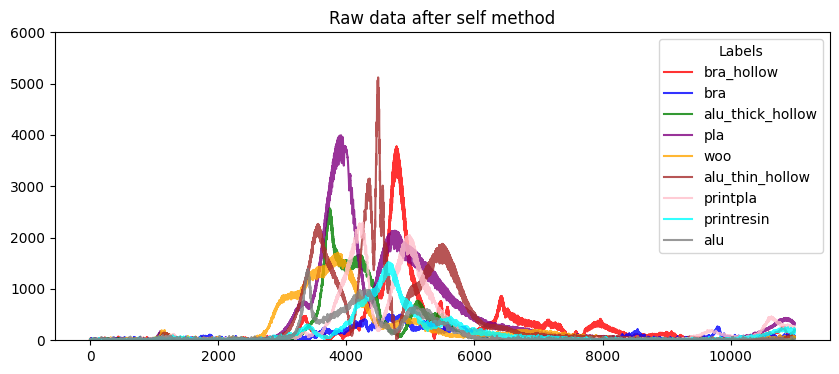

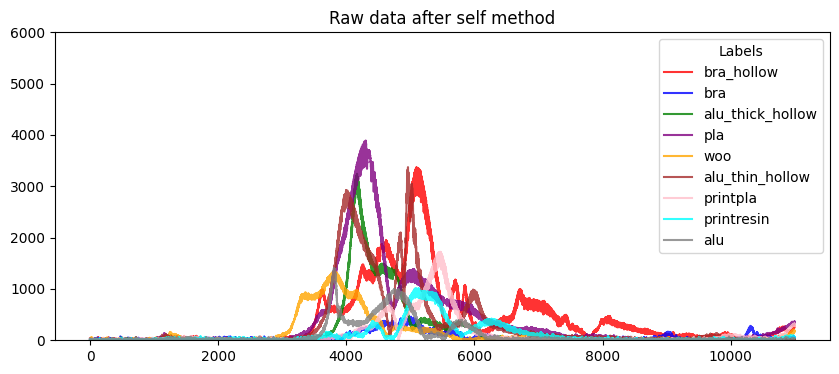

In [34]:
plot_single(X_train,y_train,100)
plot_single(X_test,y_test,10)

In [205]:
X_test, y_test = X2,y2
X_test = kpca.transform(X_test)
y_pred=knn.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.00%


In [207]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labellist))
temp=classification_report(y_test, y_pred, target_names=labellist, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
                      precision    recall  f1-score   support

half_contact_in_hole       0.38      0.90      0.53        10
 right_above_in_hole       0.67      0.80      0.73        10
       not_in_hole_1       0.50      0.10      0.17        10
 dia_contact_in_hole       0.09      0.10      0.10        10
       not_in_hole_2       1.00      0.10      0.18        10

            accuracy                           0.40        50
           macro avg       0.53      0.40      0.34        50
        weighted avg       0.53      0.40      0.34        50



In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

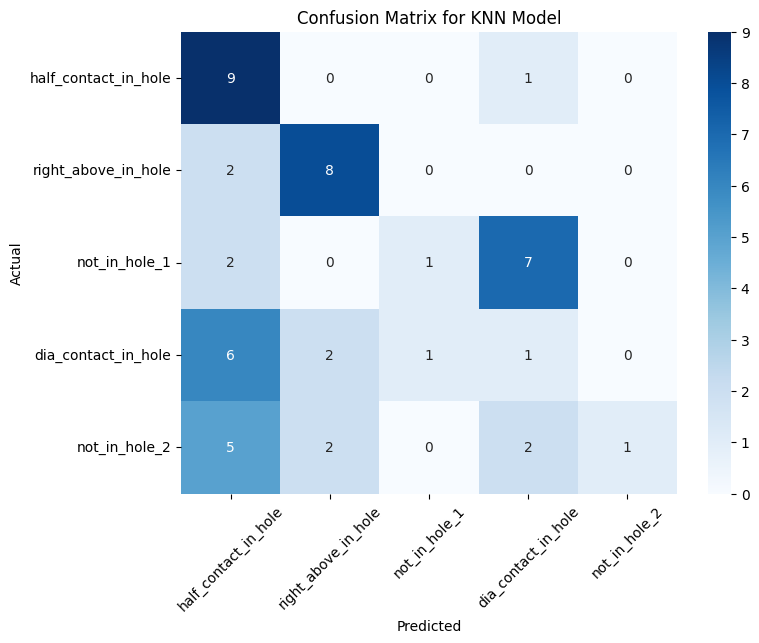

In [208]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labellist, yticklabels=labellist)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.00%


In [165]:
output.T.to_csv('contact_withoutPoint_train_11_04_test_11_04_after_fft.csv')

In [72]:
import pickle 
pickle.dump(knn, open("Knn_train_11_01", 'wb'))

In [73]:
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)

Score:  0.8777777777777778


In [166]:
X.shape

(500, 42000)

In [191]:
X_test.shape

(50, 449)

In [165]:
X_train.shape

(450, 449)